本文我们主要介绍如何利用opencv来对图片进行一些简单的操作，如 histogram_equalization, low_pass_filter, high_pass_filter, 拉普拉斯金字塔等。

In [2]:
import cv2
import sys
import os
import numpy
import matplotlib.pyplot as plt
% matplotlib inline

## show image in jupyter with matplotlib 在jupyter 中用matplotlib 显示图片

Because matplotlib show the image RBG, while opencv process it in BGR’

ref：

https://giusedroid.blogspot.com/2015/04/blog-post.html

https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.imshow.html

In [3]:
def imshow_in_jupyter(img):
    img_plt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_plt)

## histogram_equalization

将图片的像素值大小安装直方图分布来分配，使得图片的对比度更改

In [4]:
def histogram_equalization(img_in):
    # Write histogram equalization here
    b,g,r=cv2.split(img_in)
    hist = cv2.calcHist([b],[0],None,[256],[0,256])
    hist = hist[:,0]
    cdf = numpy.cumsum(hist)
    cdf_normalized = numpy.uint8(cdf * 256.0 / (cdf.max()+1))
    b = cdf_normalized[b]
    hist = cv2.calcHist([g],[0],None,[256],[0,256])
    hist = hist[:,0]
    cdf = numpy.cumsum(hist)
    cdf_normalized = numpy.uint8(cdf * 256.0 / (cdf.max()+1))
    g = cdf_normalized[g]
    hist = cv2.calcHist([r],[0],None,[256],[0,256])
    hist = hist[:,0]
    cdf = numpy.cumsum(hist)
    cdf_normalized = numpy.uint8(cdf * 256.0 / (cdf.max()+1))
    r = cdf_normalized[r]
    img_in = cv2.merge([b,g,r])
    img_out = img_in # Histogram equalization result
    return hist, cdf_normalized, img_out

In [7]:
img = cv2.imread('../HW1Filters/input/input1.jpg')
hist, cdf_normalized, img_hist = histogram_equalization(img)

Text(0.5,1,'cdf')

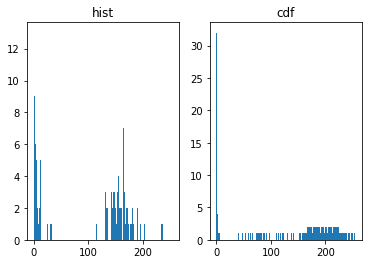

In [8]:
plt.subplot(121)
plt.hist(hist, bins = range(255))
plt.title("hist")
plt.subplot(122)
plt.hist(cdf_normalized, bins = range(255))
plt.title("cdf")

Text(0.5,1,'hist equalized image')

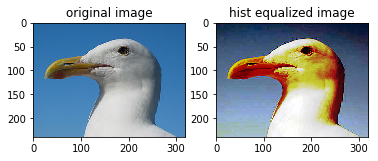

In [9]:
plt.subplot(121)
imshow_in_jupyter(img)
plt.title("original image")
plt.subplot(122)
imshow_in_jupyter(img_hist)
plt.title("hist equalized image")

## Frequency Domain filtering
### 傅里叶变换
任一函数都可以表示成无数个正弦和余弦函数的和的形式。傅立叶变换就是一个用来将函数分解的工具。 而一张图片本身也是一个函数，也可以被分解成正余弦函数和的形式。

而我们把这种分解认为是从图像的空间形式转换成图像的频率形式。

得到傅里叶变换：
dft = cv2.dft(img)

将频率为零的点移到中间:
dft_shift = numpy.fft.fftshift(dft)

ref:
https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.fft.html

### Low pass filter 低通道滤波
我们将把图像的频谱中频率较低的部分去处，只保留频率高的部分。

In [16]:
def low_pass_filter(img_in):
    # Write low pass filter here
    img_in = cv2.cvtColor(img_in, cv2.COLOR_BGR2GRAY)
    # get the frequency domain
    dft = cv2.dft(numpy.float32(img_in),flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = numpy.fft.fftshift(dft)
    rows,cols = img_in.shape
    crow = int(rows/2)
    ccol = int(cols/2)
    mask = numpy.zeros((rows,cols,2),numpy.uint8)
    mask[crow-10:crow+10, ccol-10:ccol+10] = 1
    fshift = dft_shift*mask
    f_ishift = numpy.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
    img_in= (img_back-numpy.amin(img_back))/(numpy.amax(img_back)-numpy.amin(img_back))
    img_in = numpy.uint8(img_in*256)
    img_out = img_in # Low pass filter result
    return img_out

In [17]:
img = cv2.imread('../HW1Filters/input/input1.jpg')
img_out = low_pass_filter(img)

因为图片是灰度的，所以不能用之前的方式显示。

ref:
https://www.zhihu.com/question/24058898

Text(0.5,1,'low pass image')

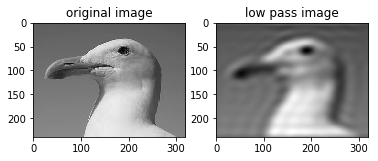

In [18]:
plt.subplot(121)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap='gray')
plt.title('original image')
plt.subplot(122)
plt.imshow(img_out,cmap='gray')
plt.title('low pass image')

### High pass filter 高通滤波
高通滤波保留高频率的信息，所以那些发生明显变化的部分会被保留下来。也即图片中物体的轮廓线条会被保留。

In [21]:
def high_pass_filter(img_in):
    # Write high pass filter here
    img_in = cv2.cvtColor(img_in, cv2.COLOR_BGR2GRAY)
    dft = cv2.dft(numpy.float32(img_in),flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = numpy.fft.fftshift(dft)
    rows,cols = img_in.shape
    crow = int(rows/2)
    ccol = int(cols/2)
    # print(crow,ccol)
    dft_shift[crow-10:crow+10, ccol-10:ccol+10] = 0
    dft_ishift = numpy.fft.ifftshift(dft_shift)
    img_back = cv2.idft(dft_ishift)
    img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
    img_in = (img_back-numpy.amin(img_back))/(numpy.amax(img_back)-numpy.amin(img_back))
    img_in = numpy.uint8(img_in*256)
    img_out = img_in # High pass filter result
    return img_out

In [23]:
img = cv2.imread('../HW1Filters/input/input1.jpg')
img_out = high_pass_filter(img)

Text(0.5,1,'high pass image')

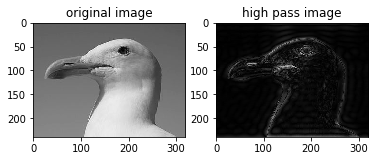

In [24]:
plt.subplot(121)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap='gray')
plt.title('original image')
plt.subplot(122)
plt.imshow(img_out,cmap='gray')
plt.title('high pass image')

### Deconvolution
反卷积: 去处卷积的作用，比如使得模糊的图片变得更清晰。
需要估计卷积核。

In [25]:
def deconvolution(img_in):
    # Write deconvolution codes here
    gk = cv2.getGaussianKernel(21,5)
    gk = gk * gk.T
    dft = numpy.fft.fft2(numpy.float32(img_in),(img_in.shape[0],img_in.shape[1]))
    imf = numpy.fft.fftshift(dft)
    # imf = ft(img_in, (img_in.shape[1],img_in.shape[1])) # make sure sizes match
    # gkf = ft(gk, (img_in.shape[1],img_in.shape[1])) # so we can multiple easily
    dft = numpy.fft.fft2(numpy.float32(gk),(img_in.shape[0],img_in.shape[1]))
    gkf = numpy.fft.fftshift(dft)
    imdeconv = numpy.true_divide(imf,gkf)
    # img_back = ift(imdeconvf)
    f_ishift = numpy.fft.ifftshift(imdeconv)
    img_back = numpy.fft.ifft2(f_ishift)
    img_back =  numpy.abs(img_back)
    img_in = (img_back-numpy.amin(img_back))/(numpy.amax(img_back)-numpy.amin(img_back))
    img_in = numpy.uint8(img_in*256)
    img_out = img_in # Deconvolution result
    return img_out

In [27]:
img = cv2.imread("../HW1Filters/input/blurred2.exr", cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
img_out = deconvolution(img)

Text(0.5,1,'After Deconvolution')

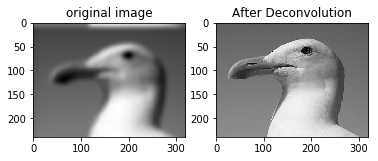

In [28]:
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.title("original image")
plt.subplot(122)
plt.imshow(img_out,cmap='gray')
plt.title("After Deconvolution")

### Laplacian Pyramid 拉普拉斯金字塔
　图像金字塔方法的原理是：将参加融合的的每幅图像分解为多尺度的金字塔图像序列，将低分辨率的图像在上层，高分辨率的图像在下层，上层图像的大小为前一层图像大小的1/4。层数为0,1,2……N。将所有图像的金字塔在相应层上以一定的规则融合，就可得到合成金字塔，再将该合成金字塔按照金字塔生成的逆过程进行重构，得到融合金字塔。这个总的思路就是一下所有基于金字塔融合的算法过程，不同点就在于分解构造的金字塔不同，每层的融合规则不一样，重构的方法不同而已。金字塔方法最先实现了这种思想，之后小波方法进一步完善和发展了这种多尺度融和的思想。
 
ref:
图像融合（三）– 拉普拉斯金字塔.http://www.cnblogs.com/silence-hust/p/4193208.html

In [31]:
def laplacian_pyramid_blending(img_in1, img_in2):
    # Write laplacian pyramid blending codes here
    img_in1 = img_in1[:,:img_in1.shape[0]]
    img_in2 = img_in2[:img_in1.shape[0],:img_in1.shape[0]]
    pD1 = img_in1.copy()
    pD2 = img_in2.copy()
    list_pD1 = [pD1]
    list_pD2 = [pD2]
    # 向下采样
    for i in range(5):
      pD1=cv2.pyrDown(pD1)
      list_pD1.append(pD1)
      pD2=cv2.pyrDown(pD2)
      list_pD2.append(pD2)
    list_lp1 = [list_pD1[4]]
    list_lp2 = [list_pD2[4]]
    for i in range(4,0,-1):
      height,width = list_pD1[i-1].shape[0:2]
      pU1 = cv2.pyrUp(list_pD1[i],dstsize=(width,height))
      lp1 = pU1.copy()
      lp1[:,:,0] = cv2.subtract(list_pD1[i-1][:,:,0],pU1[:,:,0])
      lp1[:,:,1] = cv2.subtract(list_pD1[i-1][:,:,1],pU1[:,:,1])
      lp1[:,:,2] = cv2.subtract(list_pD1[i-1][:,:,2],pU1[:,:,2])
      list_lp1.append(lp1)
      height,width = list_pD2[i-1].shape[0:2]
      pU2 = cv2.pyrUp(list_pD2[i],dstsize=(width,height))#,dstsize=list_pD1[i-1].shape[0:2])
      lp2 = pU2.copy()
      lp2[:,:,0] = cv2.subtract(list_pD2[i-1][:,:,0],pU2[:,:,0])
      lp2[:,:,1] = cv2.subtract(list_pD2[i-1][:,:,1],pU2[:,:,1])
      lp2[:,:,2] = cv2.subtract(list_pD2[i-1][:,:,2],pU2[:,:,2])
      list_lp2.append(lp2)
    LP = []
    for i in range(len(list_lp1)):
      height,width,depth = list_lp1[i].shape
      lp = numpy.hstack((list_lp1[i][:,0:int(width/2),:],list_lp2[i][:,int(width/2):,:]))
      LP.append(lp)
    lp = LP[0]
    for i in range(1,len(LP)):
      height,width = LP[i].shape[0:2]
      lp = cv2.pyrUp(lp,dstsize=(width,height))
      lp = cv2.add(lp,LP[i])
    img_in1 = lp
    img_out = img_in1 # Blending result
    return img_out

In [32]:
input_image1 = cv2.imread('../HW1Filters/input/input3A.jpg', cv2.IMREAD_COLOR)
input_image2 = cv2.imread('../HW1Filters/input/input3B.jpg', cv2.IMREAD_COLOR)
img_out = laplacian_pyramid_blending(input_image1, input_image2)

In [ ]:
plt.subplot(131)
imshow_in_jupyter(input_image1)
plt.title("image1")
plt.subplot(132)
imshow_in_jupyter(input_image2)
plt.title("image2")
plt.subplot(133)
imshow_in_jupyter(img_out)
plt.title("blending image")